# Computer Networks Lab 4
### Rohith Sudheer
### CS16B030

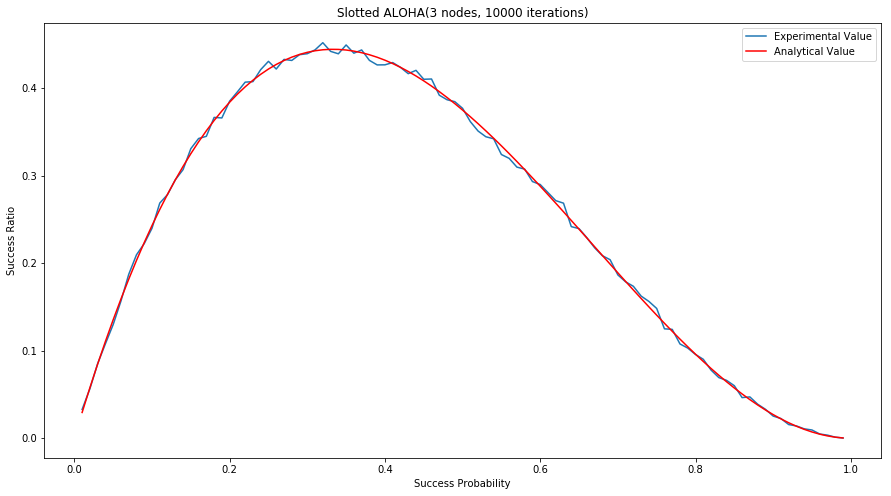

In [44]:
import random
import matplotlib.pyplot as plt
import numpy as np

n = 3                 #Number of nodes
iterations = 10000    #Number of iterations
probability = list(map(lambda x : float(x)/100,range(1,100)))     #Array of probability values
random.seed(1)        #Seeding the random number generator

#Returns success or failure with probability 'p' using a uniformly generated random number
def uniform_success(p):
    if random.random() < p:
        return 1
    return 0

#Gives the analytical value expected for n nodes and success probability p ( n*p*( (1-p)**(1-n) ) )
def analyticValue(n,p):
    return n*p*((1-p)**(n-1))

successList = []       #Store the number of successes for each probability value
for p in probability:  #Run the experiment for each probability value
    success = 0
    for i in range(iterations):    #Runs the trail 'iterations' number of times
        experiments = [uniform_success(p) for j in range(n)]   #Generates 'n' experiment values (1 for success)
        if sum(experiments) == 1:           #If the sum is 1, trail is a success
            success += 1
    successList.append(success/iterations)  #Add the success ratio for that probability

#Plot the experimental and analytical values
fig = plt.figure(figsize = (15,8))
plt.plot(np.array(probability),np.array(successList),label='Experimental Value')
plt.plot(np.array(probability),np.array(list(map(lambda x : analyticValue(n,x),probability))),'r',label='Analytical Value')
plt.title("Slotted ALOHA("+str(n)+" nodes, "+str(iterations)+" iterations)")
plt.xlabel("Success Probability")
plt.ylabel("Success Ratio")
plt.legend(loc='upper right')
fig.show()